In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#Uncomment before run for colab
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [9]:
df = pd.read_csv("heart.csv")

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# To know the length , mean ,std of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


([<matplotlib.patches.Wedge at 0x7f3929269f10>,
 [Text(-0.13462235020674507, -1.091731112877531, 'Male'),
  Text(0.13462245242198823, 1.0917311002732724, 'Female')],
 [Text(-0.07343037284004275, -0.5954896979331987, '68%'),
  Text(0.07343042859381176, 0.5954896910581484, '32%')])

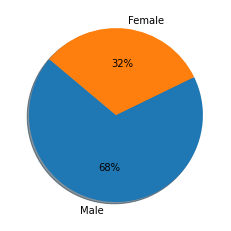

In [13]:
#Visualize
m, f = df['sex'].value_counts()[1], df['sex'].value_counts()[0]
gen = [m, f]
lab = ['Male', 'Female']
plt.pie(gen, labels = lab, shadow = True, autopct = '%1.0f%%', startangle = 140)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    207
0     96
Name: sex, dtype: int64

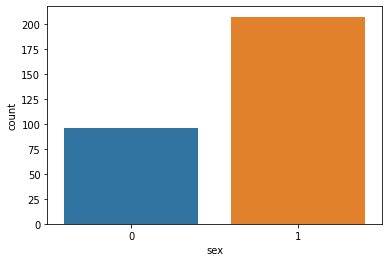

In [15]:
sns.countplot('sex', data = df)
df['sex'].value_counts()

Text(0.5, 6.79999999999999, 'HEART RATE')

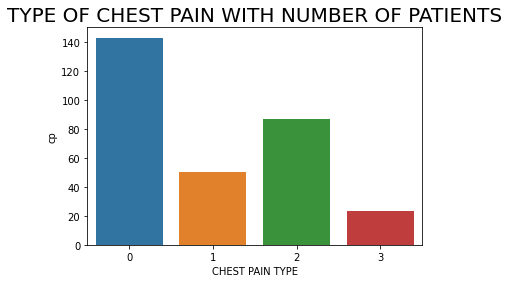

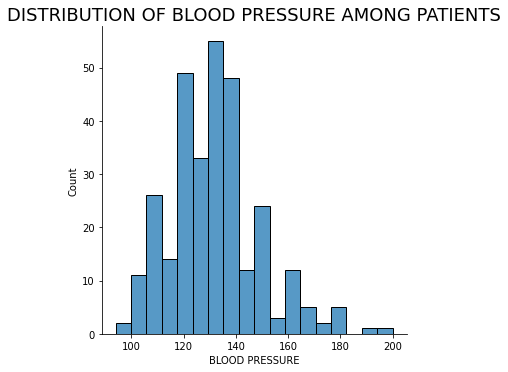

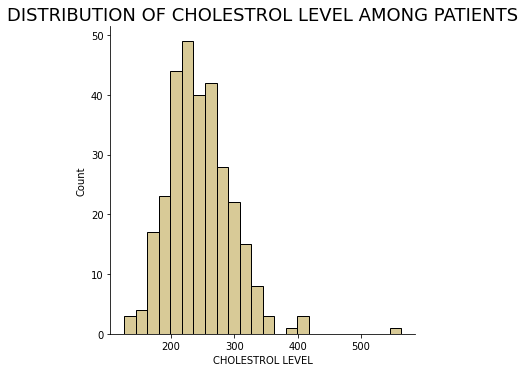

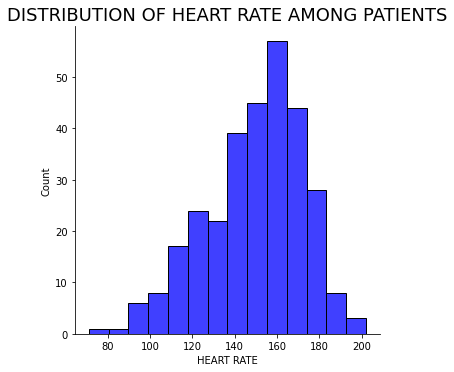

In [16]:
#Age
sns.countplot(x=df["age"]);
plt.title("Age tdistribution", fontsize=15)
plt.xlabel("AGE")

#Chest pain
chest_pain_count = df["cp"].value_counts().reset_index()
sns.barplot(x=chest_pain_count["index"], y=chest_pain_count["cp"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS", fontsize=20)
plt.xlabel("CHEST PAIN TYPE")

sns.displot(df["trestbps"])   
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE")

sns.set_color_codes()
sns.displot(df["chol"], color="y")
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS", fontsize=18)
plt.xlabel("CHOLESTROL LEVEL")

sns.displot(df["thalach"], color="blue")
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS", fontsize=18)
plt.xlabel("HEART RATE")

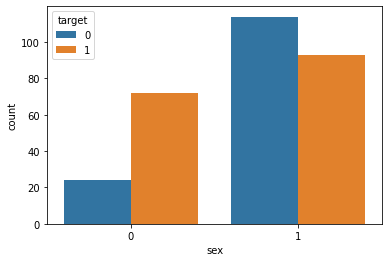

In [17]:
sns.countplot(x = 'sex', hue='target', data = df)

In [18]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [20]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [22]:
#Data is ready
#Let's verify
len(x_train) , len(y_train),len(x_test) , len(y_test)

(212, 212, 91, 91)

In [23]:
#first train logistic regresion
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
logModelAcc = accuracy_score(y_test,predictions)*100
logModelAcc

81.31868131868131

In [25]:
from sklearn.metrics import classification_report
report_logis = classification_report(predictions,y_test)
print(report_logis)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



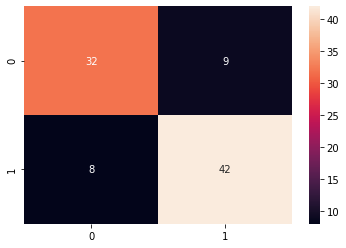

In [26]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,predictions), annot=True);

In [27]:
#Model 2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
decTree.fit(x_train,y_train)
y_predDec = decTree.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
report_dtree = classification_report(y_predDec,y_test)
print(report_dtree)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [29]:
from sklearn.metrics import accuracy_score
decTreeAcc = accuracy_score(y_test,y_predDec)*100
decTreeAcc

76.92307692307693

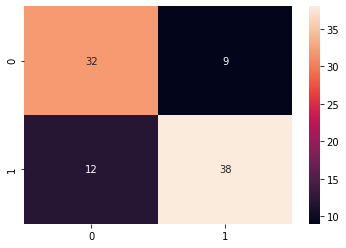

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predDec), annot=True);

In [31]:
#Model 3 XgBoost
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=2, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
predXg = model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
report_Xg = classification_report(predXg,y_test)
print(report_Xg)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.82      0.85      0.84        48

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [33]:
from sklearn.metrics import accuracy_score
XgBoostAcc = accuracy_score(y_test, predXg)*100
XgBoostAcc

82.41758241758241

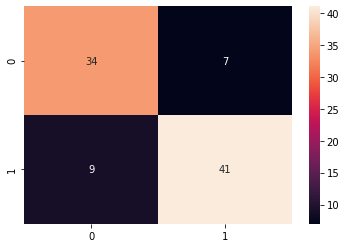

In [34]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,predXg), annot=True);

In [35]:
#Compare all 3 models
model_data=[['Logistic Regression',logModelAcc],['Decision Tree',decTreeAcc] , ['XgBoost' , XgBoostAcc]]
model_df = pd.DataFrame(model_data , columns=['Model', 'Accuracy'])
model_df.set_index(['Model'],inplace=True)
model_df

,Accuracy
Model,
Logistic Regression,81.318681
Decision Tree,76.923077
XgBoost,82.417582


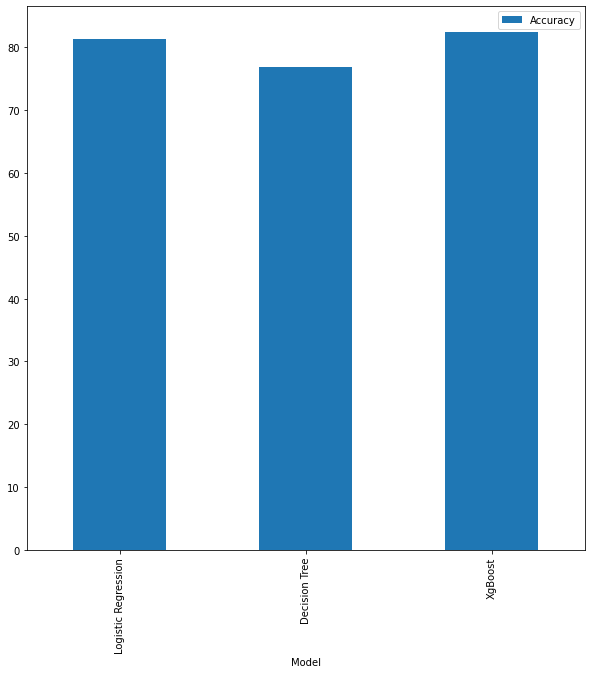

In [36]:
model_df.plot(kind='bar',figsize=(10,10))

In [37]:
# Model 4 KnearestNeighbour
Size = plt.figure(19) 
Size.set_figwidth(4) 
Size.set_figheight(1)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)  #all possible neighbour
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

<Figure size 288x72 with 0 Axes>

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

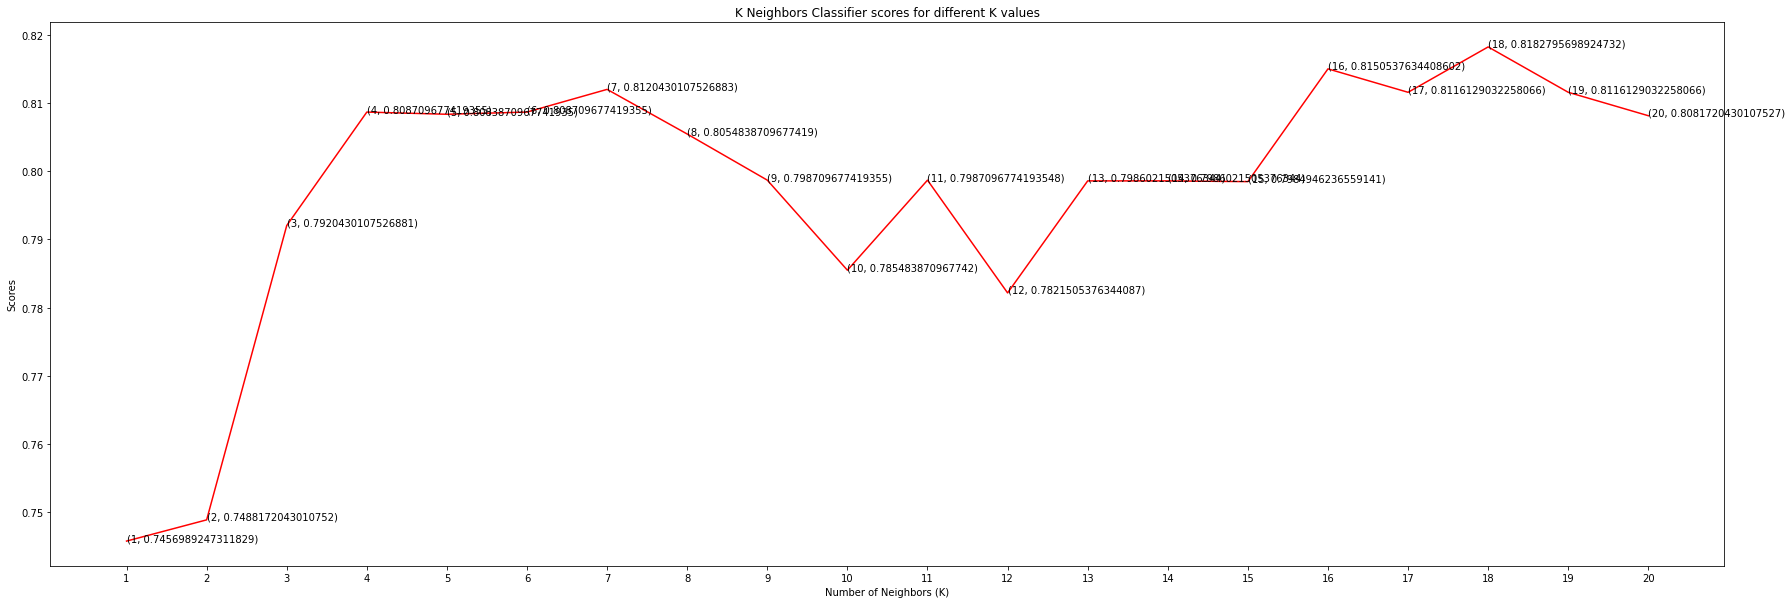

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 10
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)  #all possible neighbour
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()    

0.7821505376344087